## Demonstration of the Contour Plot using Gradient descent method for a simple linear regression model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [3]:
data = pd.read_csv('./4K_House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data.shape

(4746, 12)

In [6]:
X = data['Size']
Y = data['Rent']

print(X)
print(Y)

m = len(X)

0       1100
1        800
2       1000
3        800
4        850
        ... 
4741    1000
4742    2000
4743    1750
4744    1500
4745    1000
Name: Size, Length: 4746, dtype: int64
0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64


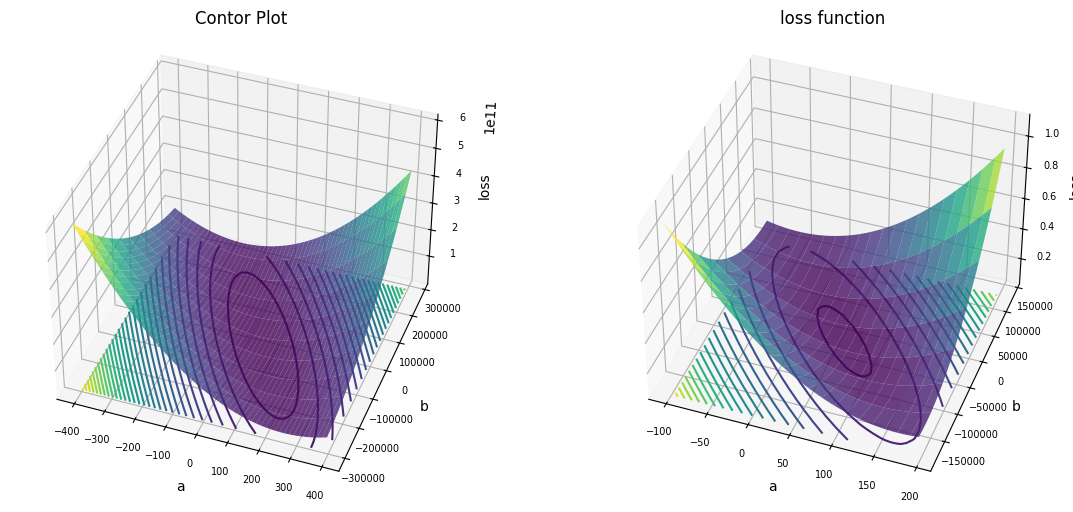

In [12]:
#Produce the plots
def loss(a,b):
  # print(a,b)  
  return 1/len(X)*(np.sum((a*X + b - Y)**2))  

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection="3d")
# generates & shuffles an array of values starting from -1 (inclusive), ending at 3.0 (exclusive), with a step of 0.05.
a = np.arange(-400, 400, 5)
b = np.arange(-300000, 300000, 20000)
A, B = np.meshgrid(a, b) # makes repetetive 2D arrays from a and b
# for a,b in zip(np.ravel(A), np.ravel(B)) makes (a, b) pairs where ravel converts 2D to 1D
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss_vals = zs.reshape(A.shape)

ax.plot_surface(A, B, loss_vals, cmap="viridis", rstride=3, cstride=3,edgecolor='none',alpha=0.8)
ax.contour(A, B, loss_vals, 30, cmap="viridis", linestyles="solid", offset=0)
ax.view_init(40, 290)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('loss',rotation="vertical")
ax.set_title('Contor Plot')
# ax.scatter3D(2.95, 2.95, 6.1589, c="r",s=90)
plt.tick_params(axis='both', which='major', labelsize=7)


ax = fig.add_subplot(1, 2, 2, projection="3d")
a = np.arange(-100, 200, 5)
b = np.arange(-180000, 150000, 15000)
A, B = np.meshgrid(a, b)
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss_vals = zs.reshape(A.shape)

ax.plot_surface(A, B, loss_vals, cmap="viridis", rstride=3, cstride=3,edgecolor='none',alpha=0.8)
ax.contour(A, B, loss_vals, 20, cmap="viridis", linestyles="solid", offset=0)
ax.view_init(40, 290)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('loss',rotation="vertical")
ax.set_title('loss function')
plt.tick_params(axis='both', which='major', labelsize=7)
